TASK:

Create NN with Keras to classify goods from dataset: https://www.tensorflow.org/datasets/catalog/fashion_mnist

Proposed NN architecture: - 
- # layers (in, den1, den2, out)
- activation func (Hidden: ReLU, Leaky ReLU, Parametric ReLU, ELU; Output: Softmax)
- # epoch (50 - 600)
- # neurons in layer (784, 128, 256, 10)
- batch size (32, 72)
- optimizer (SGD,  Adam)
- initial learning rate (0.025)
- validation rate in training data (40%)
Requirement of accuracy: >=0.91

# MODEL sgd_b32_ep50

In [142]:
from tensorflow import keras

In [143]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [144]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [145]:
# Initial data
num_classes = 10 # total class number
num_features = 784 # input layer vector 28 * 28 = 784

learning_rate = 0.025 # 
training_steps = 50 # number of epoch
batch_size = 32 # пересчитывать веса сети мы будем не на всей выборке, а на ее случайном подможестве из batch_size элементов

n_hidden_1 = 128 # количество нейронов 1-го слоя
n_hidden_2 = 256 # количество нейронов 2-го слоя

In [146]:
# Преобразуем целочисленные пиксели к типа float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Преобразуем матрицы размером 28x28 пикселей в вектор из 784 элементов
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Нормализуем значения пикселей
x_train, x_test = x_train / 255., x_test / 255.

# Convert labels to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Перемешаем тренировочные данные
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(10)


In [147]:
from keras.models import Sequential
from keras.layers import Dense

In [148]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax'),
])

In [149]:
model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [150]:
x_val = x_train[:20000]
partial_x_train = x_train[20000:]

y_val = y_train[:20000]
partial_y_train = y_train[20000:]

In [151]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=training_steps,
    batch_size=batch_size,
    validation_data=(x_val, y_val)
)

Epoch 1/50
1250/1250 [==============================] - 5s 3ms/step - loss: 0.8435 - accuracy: 0.7304 - val_loss: 0.5929 - val_accuracy: 0.7990
Epoch 2/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.5410 - accuracy: 0.8154 - val_loss: 0.4960 - val_accuracy: 0.8305
Epoch 3/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.4856 - accuracy: 0.8314 - val_loss: 0.4595 - val_accuracy: 0.8407
Epoch 4/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.4533 - accuracy: 0.8433 - val_loss: 0.4461 - val_accuracy: 0.8443
Epoch 5/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.4326 - accuracy: 0.8497 - val_loss: 0.4376 - val_accuracy: 0.8464
Epoch 6/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.4146 - accuracy: 0.8561 - val_loss: 0.4176 - val_accuracy: 0.8534
Epoch 7/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.4014 - accuracy: 0.8601 - val_loss: 0.4079 - val_accuracy:

In [152]:
results = model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 1s 3ms/step - loss: 0.3501 - accuracy: 0.8793
[0.35006412863731384, 0.8792999982833862]


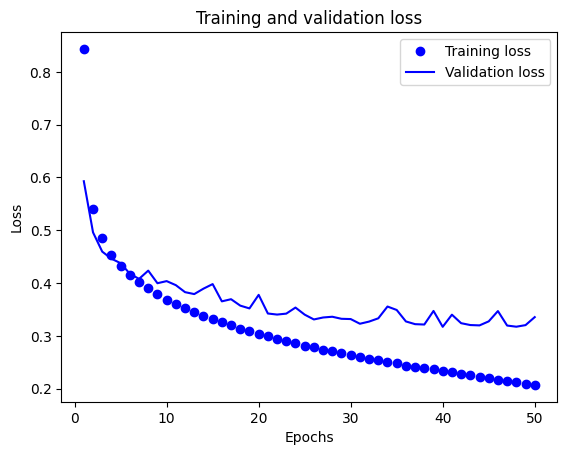

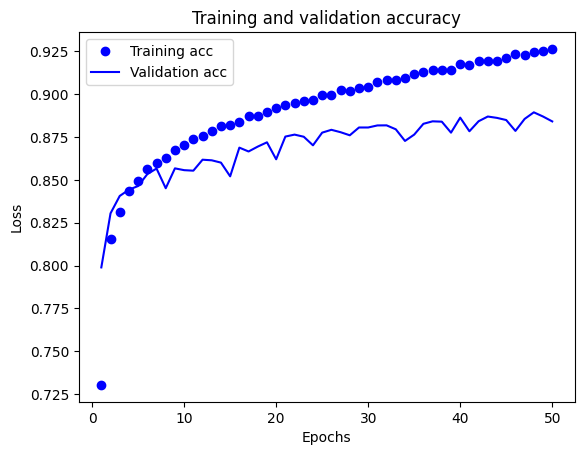

In [153]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [154]:
model.save("sgd_b32_ep50")

INFO:tensorflow:Assets written to: sgd_b32_ep50\assets


INFO:tensorflow:Assets written to: sgd_b32_ep50\assets


In [155]:
random_index = np.random.randint(0, len(x_test))
result = model.predict(x_test[random_index, :].reshape(1, 784))

predicted_class = np.argmax(result)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

predicted_class_name = class_names[predicted_class]
print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 63ms/step
Predicted class name: Sandal


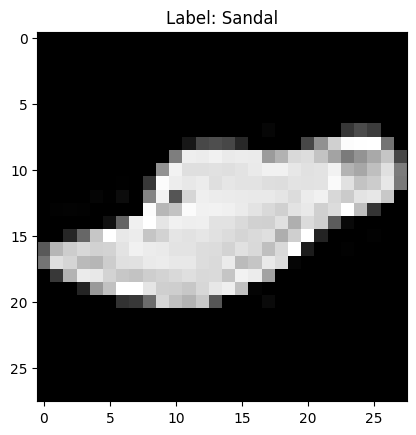

In [156]:

plt.imshow(x_test[random_index, :].reshape(28, 28), cmap='gray')
plt.title(f"Label: {predicted_class_name}")
plt.show()

# MODEL Adam_b32_ep50

In [171]:
from tensorflow import keras

In [172]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [173]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [174]:
# Initial data
num_classes = 10 # total class number
num_features = 784 # input layer vector 28 * 28 = 784

learning_rate = 0.025 # 
training_steps = 50 # number of epoch
batch_size = 32 # пересчитывать веса сети мы будем не на всей выборке, а на ее случайном подможестве из batch_size элементов

n_hidden_1 = 128 # количество нейронов 1-го слоя
n_hidden_2 = 256 # количество нейронов 2-го слоя

In [175]:
# Преобразуем целочисленные пиксели к типа float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Преобразуем матрицы размером 28x28 пикселей в вектор из 784 элементов
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Нормализуем значения пикселей
x_train, x_test = x_train / 255., x_test / 255.

# Convert labels to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Перемешаем тренировочные данные
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(10)


In [176]:
from keras.models import Sequential
from keras.layers import Dense

In [177]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax'),
])

In [178]:
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [179]:
x_val = x_train[:20000]
partial_x_train = x_train[20000:]

y_val = y_train[:20000]
partial_y_train = y_train[20000:]

In [180]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=training_steps,
    batch_size=batch_size,
    validation_data=(x_val, y_val)
)

Epoch 1/50
1250/1250 [==============================] - 6s 4ms/step - loss: 0.5148 - accuracy: 0.8154 - val_loss: 0.4103 - val_accuracy: 0.8443
Epoch 2/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3846 - accuracy: 0.8598 - val_loss: 0.3645 - val_accuracy: 0.8658
Epoch 3/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3442 - accuracy: 0.8719 - val_loss: 0.3598 - val_accuracy: 0.8655
Epoch 4/50
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3186 - accuracy: 0.8819 - val_loss: 0.3428 - val_accuracy: 0.8747
Epoch 5/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3006 - accuracy: 0.8894 - val_loss: 0.3405 - val_accuracy: 0.8731
Epoch 6/50
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2834 - accuracy: 0.8936 - val_loss: 0.3679 - val_accuracy: 0.8734
Epoch 7/50
1250/1250 [==============================] - 6s 4ms/step - loss: 0.2687 - accuracy: 0.9003 - val_loss: 0.3151 - val_accuracy:

In [181]:
results = model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 1s 3ms/step - loss: 0.7252 - accuracy: 0.8864
[0.7251793742179871, 0.8863999843597412]


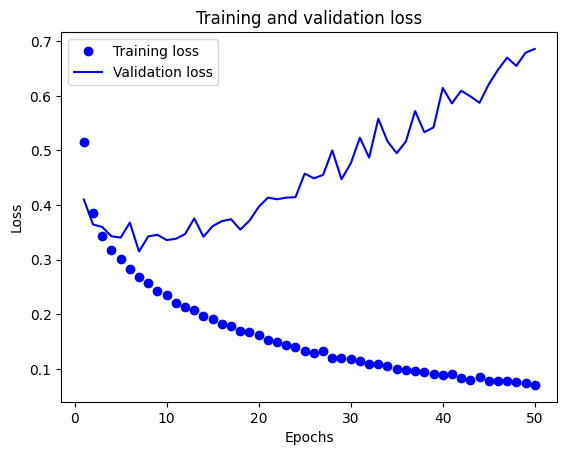

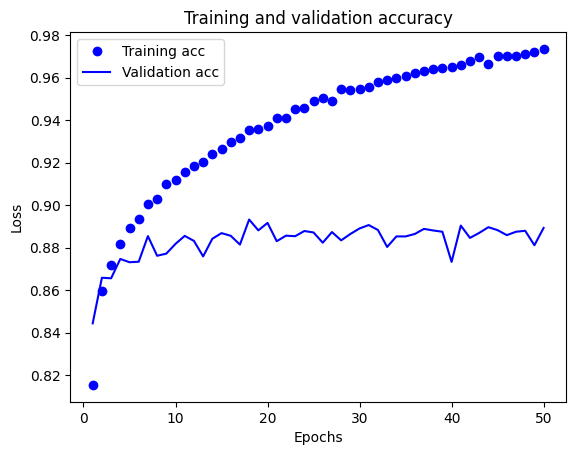

In [182]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [183]:
model.save("Adam_2_b32_ep50")

INFO:tensorflow:Assets written to: Adam_2_b32_ep50\assets


INFO:tensorflow:Assets written to: Adam_2_b32_ep50\assets


In [184]:
random_index = np.random.randint(0, len(x_test))
result = model.predict(x_test[random_index, :].reshape(1, 784))

predicted_class = np.argmax(result)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

predicted_class_name = class_names[predicted_class]
print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 94ms/step
Predicted class: 5


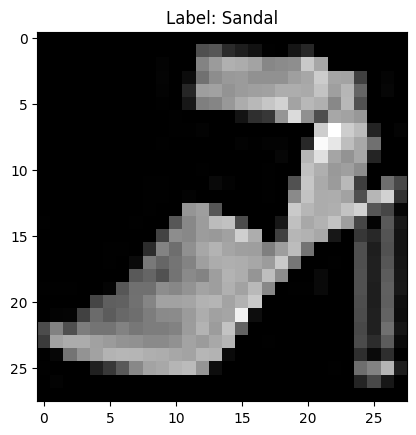

In [185]:

plt.imshow(x_test[random_index, :].reshape(28, 28), cmap='gray')
plt.title(f"Label: {predicted_class_name}")
plt.show()

# MODEL Adamax_b32_ep50

In [195]:
from tensorflow import keras

In [196]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [197]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [198]:
# Initial data
num_classes = 10 # total class number
num_features = 784 # input layer vector 28 * 28 = 784

learning_rate = 0.025 # 
training_steps = 50 # number of epoch
batch_size = 32 # пересчитывать веса сети мы будем не на всей выборке, а на ее случайном подможестве из batch_size элементов

n_hidden_1 = 128 # количество нейронов 1-го слоя
n_hidden_2 = 256 # количество нейронов 2-го слоя

In [199]:
# Преобразуем целочисленные пиксели к типа float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Преобразуем матрицы размером 28x28 пикселей в вектор из 784 элементов
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Нормализуем значения пикселей
x_train, x_test = x_train / 255., x_test / 255.

# Convert labels to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Перемешаем тренировочные данные
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(10)


In [200]:
from keras.models import Sequential
from keras.layers import Dense

In [201]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax'),
])

In [205]:
model.compile(
    optimizer='Adamax',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [206]:
x_val = x_train[:20000]
partial_x_train = x_train[20000:]

y_val = y_train[:20000]
partial_y_train = y_train[20000:]

In [207]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=training_steps,
    batch_size=batch_size,
    validation_data=(x_val, y_val)
)

Epoch 1/50
1250/1250 [==============================] - 6s 5ms/step - loss: 0.5698 - accuracy: 0.8034 - val_loss: 0.4410 - val_accuracy: 0.8419
Epoch 2/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.4145 - accuracy: 0.8536 - val_loss: 0.4042 - val_accuracy: 0.8539
Epoch 3/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3737 - accuracy: 0.8683 - val_loss: 0.3736 - val_accuracy: 0.8670
Epoch 4/50
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3460 - accuracy: 0.8755 - val_loss: 0.3566 - val_accuracy: 0.8719
Epoch 5/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3273 - accuracy: 0.8830 - val_loss: 0.3454 - val_accuracy: 0.8758
Epoch 6/50
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3077 - accuracy: 0.8877 - val_loss: 0.3523 - val_accuracy: 0.8746
Epoch 7/50
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2943 - accuracy: 0.8918 - val_loss: 0.3241 - val_accuracy:

In [208]:
results = model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 1s 4ms/step - loss: 0.4409 - accuracy: 0.8854
[0.4408854842185974, 0.8853999972343445]


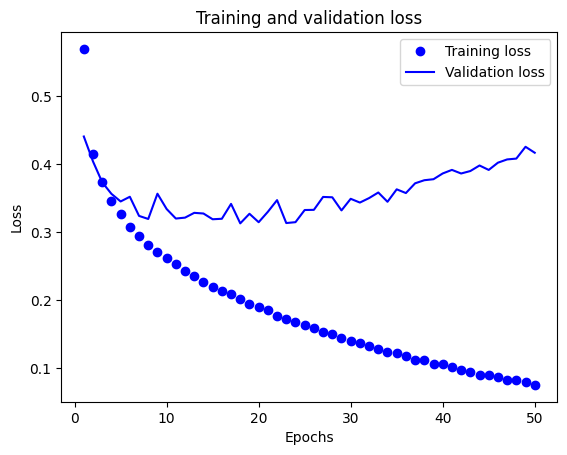

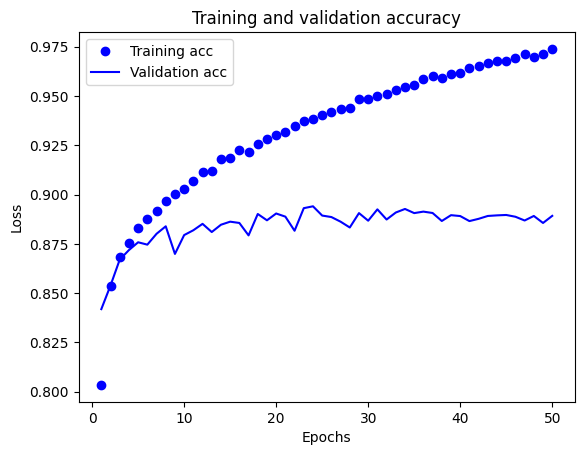

In [209]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [210]:
model.save("Adamax_b32_ep50")

INFO:tensorflow:Assets written to: Adamax_b32_ep50\assets


INFO:tensorflow:Assets written to: Adamax_b32_ep50\assets


In [211]:
random_index = np.random.randint(0, len(x_test))
result = model.predict(x_test[random_index, :].reshape(1, 784))

predicted_class = np.argmax(result)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

predicted_class_name = class_names[predicted_class]
print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 64ms/step
Predicted class: 0


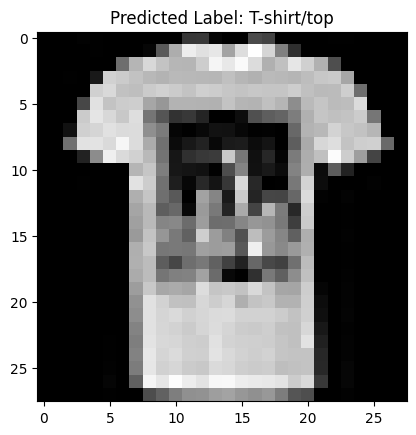

In [213]:

plt.imshow(x_test[random_index, :].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {predicted_class_name}")
plt.show()

# MODEL Adam_b32_ep50_reg

In [1]:
from tensorflow import keras

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [4]:
# Initial data
num_classes = 10 # total class number
num_features = 784 # input layer vector 28 * 28 = 784

learning_rate = 0.025 # 
training_steps = 50 # number of epoch
batch_size = 32 # пересчитывать веса сети мы будем не на всей выборке, а на ее случайном подможестве из batch_size элементов

n_hidden_1 = 128 # количество нейронов 1-го слоя
n_hidden_2 = 256 # количество нейронов 2-го слоя

In [5]:
# Преобразуем целочисленные пиксели к типа float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Преобразуем матрицы размером 28x28 пикселей в вектор из 784 элементов
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Нормализуем значения пикселей
x_train, x_test = x_train / 255., x_test / 255.

# Convert labels to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Перемешаем тренировочные данные
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(10)


In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,), kernel_regularizer='l2'),
    Dense(256, activation='relu', kernel_regularizer='l2'),
    Dense(10, activation='softmax'),
])

In [8]:
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
x_val = x_train[:20000]
partial_x_train = x_train[20000:]

y_val = y_train[:20000]
partial_y_train = y_train[20000:]

In [10]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=training_steps,
    batch_size=batch_size,
    validation_data=(x_val, y_val)
)

Epoch 1/50
1250/1250 [==============================] - 6s 4ms/step - loss: 1.1541 - accuracy: 0.7817 - val_loss: 0.7303 - val_accuracy: 0.8089
Epoch 2/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.7039 - accuracy: 0.8111 - val_loss: 0.7449 - val_accuracy: 0.7814
Epoch 3/50
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6600 - accuracy: 0.8189 - val_loss: 0.6352 - val_accuracy: 0.8252
Epoch 4/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.6218 - accuracy: 0.8259 - val_loss: 0.5934 - val_accuracy: 0.8372
Epoch 5/50
1250/1250 [==============================] - 6s 5ms/step - loss: 0.5989 - accuracy: 0.8333 - val_loss: 0.5912 - val_accuracy: 0.8301
Epoch 6/50
1250/1250 [==============================] - 6s 5ms/step - loss: 0.5832 - accuracy: 0.8355 - val_loss: 0.5720 - val_accuracy: 0.8338
Epoch 7/50
1250/1250 [==============================] - 6s 5ms/step - loss: 0.5717 - accuracy: 0.8366 - val_loss: 0.5560 - val_accuracy:

In [11]:
results = model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 1s 2ms/step - loss: 0.5357 - accuracy: 0.8436
[0.5357044339179993, 0.8435999751091003]


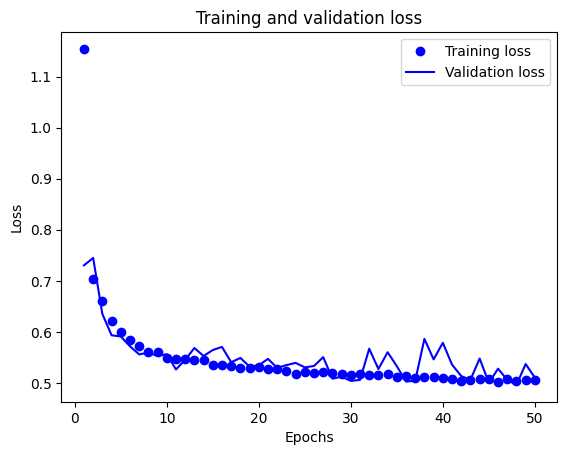

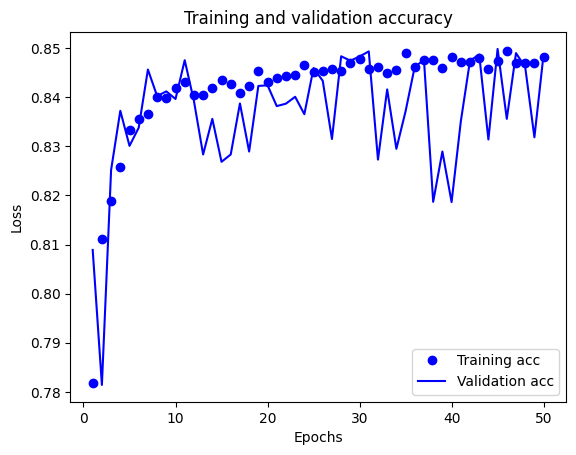

In [12]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [13]:
model.save("Adam_b32_ep50_reg")

INFO:tensorflow:Assets written to: Adam_b32_ep50_reg\assets


INFO:tensorflow:Assets written to: Adam_b32_ep50_reg\assets


In [16]:
random_index = np.random.randint(0, len(x_test))
result = model.predict(x_test[random_index, :].reshape(1, 784))

predicted_class = np.argmax(result)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

predicted_class_name = class_names[predicted_class]
print(f"Predicted class: {predicted_class+1}")

1/1 [==============================] - 0s 30ms/step
Predicted class: 5


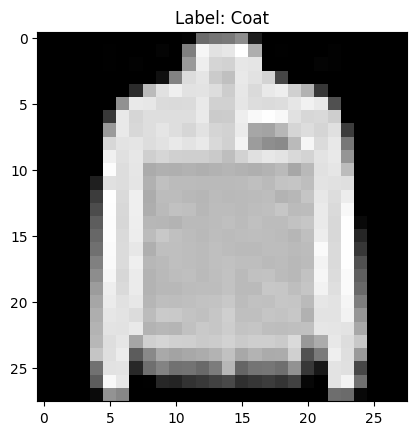

In [17]:

plt.imshow(x_test[random_index, :].reshape(28, 28), cmap='gray')
plt.title(f"Label: {predicted_class_name}")
plt.show()

# MODEL Adam_b128_ep200_reg

In [60]:
from tensorflow import keras

In [61]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [62]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [63]:
# Initial data
num_classes = 10 # total class number
num_features = 784 # input layer vector 28 * 28 = 784

learning_rate = 0.025 # 
training_steps = 200 # number of epoch
batch_size = 128 # пересчитывать веса сети мы будем не на всей выборке, а на ее случайном подможестве из batch_size элементов

n_hidden_1 = 128 # количество нейронов 1-го слоя
n_hidden_2 = 256 # количество нейронов 2-го слоя

In [64]:
# Преобразуем целочисленные пиксели к типа float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Преобразуем матрицы размером 28x28 пикселей в вектор из 784 элементов
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Нормализуем значения пикселей
x_train, x_test = x_train / 255., x_test / 255.

# Convert labels to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Перемешаем тренировочные данные
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(10)


In [65]:
from keras.models import Sequential
from keras.layers import Dense

In [66]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,), kernel_regularizer='l2'),
    Dense(256, activation='relu', kernel_regularizer='l2'),
    Dense(10, activation='softmax'),
])

In [67]:
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [68]:
x_val = x_train[:20000]
partial_x_train = x_train[20000:]

y_val = y_train[:20000]
partial_y_train = y_train[20000:]

In [69]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=training_steps,
    batch_size=batch_size,
    validation_data=(x_val, y_val)
)

Epoch 1/200
313/313 [==============================] - 3s 6ms/step - loss: 1.6938 - accuracy: 0.7708 - val_loss: 0.8850 - val_accuracy: 0.8177
Epoch 2/200
313/313 [==============================] - 2s 6ms/step - loss: 0.7845 - accuracy: 0.8189 - val_loss: 0.7124 - val_accuracy: 0.8216
Epoch 3/200
313/313 [==============================] - 2s 6ms/step - loss: 0.6812 - accuracy: 0.8259 - val_loss: 0.6778 - val_accuracy: 0.8153
Epoch 4/200
313/313 [==============================] - 2s 7ms/step - loss: 0.6505 - accuracy: 0.8281 - val_loss: 0.6588 - val_accuracy: 0.8138
Epoch 5/200
313/313 [==============================] - 2s 7ms/step - loss: 0.6286 - accuracy: 0.8307 - val_loss: 0.6360 - val_accuracy: 0.8221
Epoch 6/200
313/313 [==============================] - 2s 7ms/step - loss: 0.6024 - accuracy: 0.8362 - val_loss: 0.6231 - val_accuracy: 0.8288
Epoch 7/200
313/313 [==============================] - 2s 5ms/step - loss: 0.5917 - accuracy: 0.8401 - val_loss: 0.5995 - val_accuracy: 0.8321

Epoch 58/200
313/313 [==============================] - 2s 6ms/step - loss: 0.4537 - accuracy: 0.8687 - val_loss: 0.4850 - val_accuracy: 0.8558
Epoch 59/200
313/313 [==============================] - 2s 6ms/step - loss: 0.4568 - accuracy: 0.8663 - val_loss: 0.4977 - val_accuracy: 0.8504
Epoch 60/200
313/313 [==============================] - 2s 7ms/step - loss: 0.4542 - accuracy: 0.8661 - val_loss: 0.5045 - val_accuracy: 0.8475
Epoch 61/200
313/313 [==============================] - 2s 5ms/step - loss: 0.4511 - accuracy: 0.8679 - val_loss: 0.4911 - val_accuracy: 0.8562
Epoch 62/200
313/313 [==============================] - 2s 6ms/step - loss: 0.4506 - accuracy: 0.8680 - val_loss: 0.5005 - val_accuracy: 0.8514
Epoch 63/200
313/313 [==============================] - 2s 7ms/step - loss: 0.4506 - accuracy: 0.8691 - val_loss: 0.4810 - val_accuracy: 0.8569
Epoch 64/200
313/313 [==============================] - 2s 6ms/step - loss: 0.4530 - accuracy: 0.8679 - val_loss: 0.5253 - val_accuracy:

Epoch 115/200
313/313 [==============================] - 2s 7ms/step - loss: 0.4355 - accuracy: 0.8707 - val_loss: 0.4601 - val_accuracy: 0.8620
Epoch 116/200
313/313 [==============================] - 2s 6ms/step - loss: 0.4306 - accuracy: 0.8724 - val_loss: 0.4477 - val_accuracy: 0.8648
Epoch 117/200
313/313 [==============================] - 2s 6ms/step - loss: 0.4316 - accuracy: 0.8724 - val_loss: 0.4457 - val_accuracy: 0.8676
Epoch 118/200
313/313 [==============================] - 2s 7ms/step - loss: 0.4293 - accuracy: 0.8718 - val_loss: 0.4692 - val_accuracy: 0.8604
Epoch 119/200
313/313 [==============================] - 2s 7ms/step - loss: 0.4338 - accuracy: 0.8712 - val_loss: 0.4808 - val_accuracy: 0.8497
Epoch 120/200
313/313 [==============================] - 2s 7ms/step - loss: 0.4289 - accuracy: 0.8725 - val_loss: 0.4760 - val_accuracy: 0.8548
Epoch 121/200
313/313 [==============================] - 2s 7ms/step - loss: 0.4305 - accuracy: 0.8708 - val_loss: 0.4625 - val_ac

313/313 [==============================] - 2s 7ms/step - loss: 0.4288 - accuracy: 0.8727 - val_loss: 0.4703 - val_accuracy: 0.8583
Epoch 172/200
313/313 [==============================] - 2s 7ms/step - loss: 0.4181 - accuracy: 0.8764 - val_loss: 0.4539 - val_accuracy: 0.8622
Epoch 173/200
313/313 [==============================] - 2s 8ms/step - loss: 0.4214 - accuracy: 0.8733 - val_loss: 0.4743 - val_accuracy: 0.8541
Epoch 174/200
313/313 [==============================] - 2s 7ms/step - loss: 0.4246 - accuracy: 0.8730 - val_loss: 0.4683 - val_accuracy: 0.8579
Epoch 175/200
313/313 [==============================] - 2s 8ms/step - loss: 0.4275 - accuracy: 0.8714 - val_loss: 0.4565 - val_accuracy: 0.8605
Epoch 176/200
313/313 [==============================] - 2s 7ms/step - loss: 0.4238 - accuracy: 0.8734 - val_loss: 0.4832 - val_accuracy: 0.8495
Epoch 177/200
313/313 [==============================] - 2s 7ms/step - loss: 0.4243 - accuracy: 0.8738 - val_loss: 0.4524 - val_accuracy: 0.8632

In [70]:
results = model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 1s 4ms/step - loss: 0.4924 - accuracy: 0.8437
[0.49244463443756104, 0.8436999917030334]


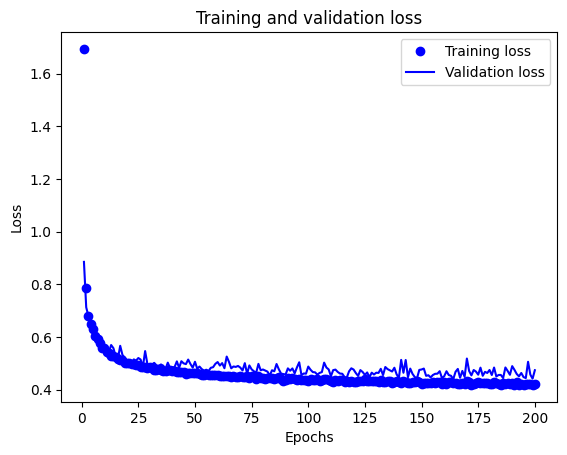

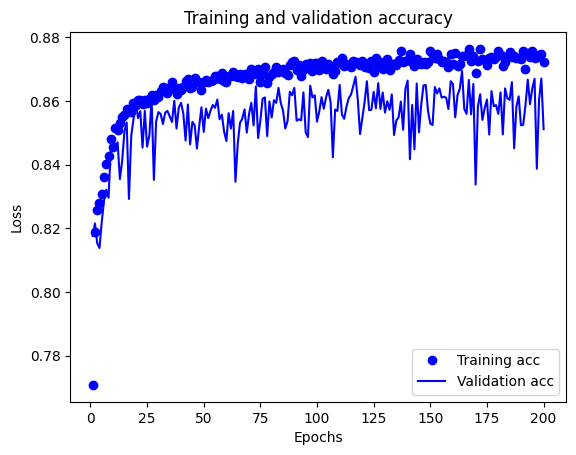

In [71]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [72]:
model.save("Adam_b128_ep200_reg")

INFO:tensorflow:Assets written to: Adam_b128_ep200_reg\assets


INFO:tensorflow:Assets written to: Adam_b128_ep200_reg\assets


In [73]:
random_index = np.random.randint(0, len(x_test))
result = model.predict(x_test[random_index, :].reshape(1, 784))

predicted_class = np.argmax(result)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

predicted_class_name = class_names[predicted_class]
print(f"Predicted class: {predicted_class+1}")

1/1 [==============================] - 0s 78ms/step
Predicted class: 3


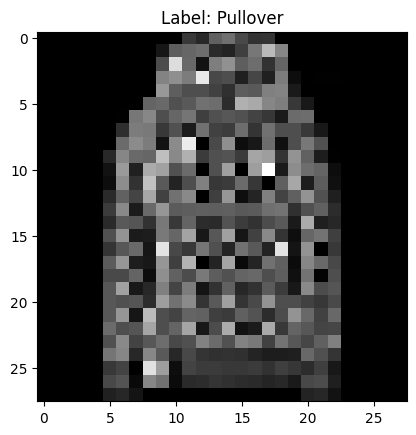

In [74]:

plt.imshow(x_test[random_index, :].reshape(28, 28), cmap='gray')
plt.title(f"Label: {predicted_class_name}")
plt.show()

# MODEL sgd_b128_ep50

In [76]:
from tensorflow import keras

In [77]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [78]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [79]:
# Initial data
num_classes = 10 # total class number
num_features = 784 # input layer vector 28 * 28 = 784

learning_rate = 0.025 # 
training_steps = 50 # number of epoch
batch_size = 128 # пересчитывать веса сети мы будем не на всей выборке, а на ее случайном подможестве из batch_size элементов

n_hidden_1 = 128 # количество нейронов 1-го слоя
n_hidden_2 = 256 # количество нейронов 2-го слоя

In [80]:
# Преобразуем целочисленные пиксели к типа float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Преобразуем матрицы размером 28x28 пикселей в вектор из 784 элементов
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Нормализуем значения пикселей
x_train, x_test = x_train / 255., x_test / 255.

# Convert labels to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Перемешаем тренировочные данные
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(10)


In [81]:
from keras.models import Sequential
from keras.layers import Dense

In [82]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax'),
])

In [83]:
model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [84]:
x_val = x_train[:20000]
partial_x_train = x_train[20000:]

y_val = y_train[:20000]
partial_y_train = y_train[20000:]

In [85]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=training_steps,
    batch_size=batch_size,
    validation_data=(x_val, y_val)
)

Epoch 1/50
313/313 [==============================] - 3s 7ms/step - loss: 1.3612 - accuracy: 0.6083 - val_loss: 0.8811 - val_accuracy: 0.7087
Epoch 2/50
313/313 [==============================] - 2s 6ms/step - loss: 0.7625 - accuracy: 0.7492 - val_loss: 0.7000 - val_accuracy: 0.7610
Epoch 3/50
313/313 [==============================] - 2s 6ms/step - loss: 0.6430 - accuracy: 0.7875 - val_loss: 0.6174 - val_accuracy: 0.7952
Epoch 4/50
313/313 [==============================] - 2s 6ms/step - loss: 0.5848 - accuracy: 0.8059 - val_loss: 0.5746 - val_accuracy: 0.8037
Epoch 5/50
313/313 [==============================] - 2s 5ms/step - loss: 0.5467 - accuracy: 0.8158 - val_loss: 0.5377 - val_accuracy: 0.8185
Epoch 6/50
313/313 [==============================] - 2s 5ms/step - loss: 0.5221 - accuracy: 0.8236 - val_loss: 0.5150 - val_accuracy: 0.8231
Epoch 7/50
313/313 [==============================] - 2s 6ms/step - loss: 0.5031 - accuracy: 0.8285 - val_loss: 0.5062 - val_accuracy: 0.8267
Epoch 

In [86]:
results = model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 1s 2ms/step - loss: 0.3935 - accuracy: 0.8621
[0.3934929072856903, 0.8621000051498413]


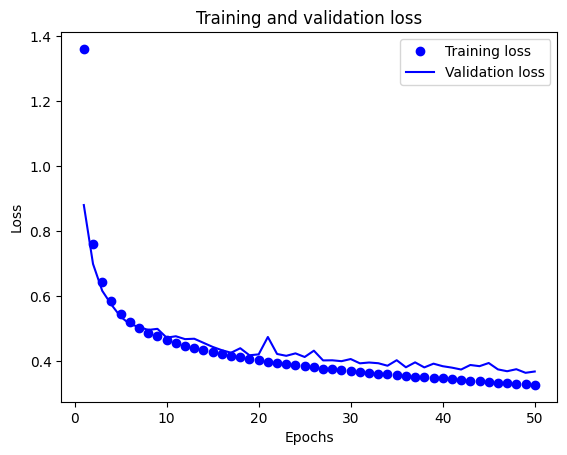

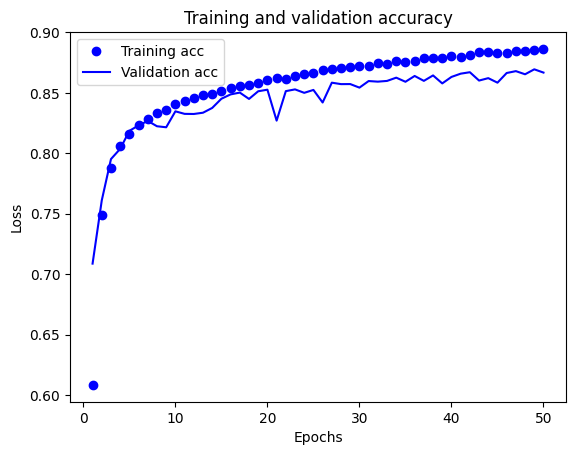

In [87]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [88]:
model.save("sgd_b128_ep50")

INFO:tensorflow:Assets written to: sgd_b128_ep50\assets


INFO:tensorflow:Assets written to: sgd_b128_ep50\assets


In [89]:
random_index = np.random.randint(0, len(x_test))
result = model.predict(x_test[random_index, :].reshape(1, 784))

predicted_class = np.argmax(result)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

predicted_class_name = class_names[predicted_class]
print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 88ms/step
Predicted class: 4


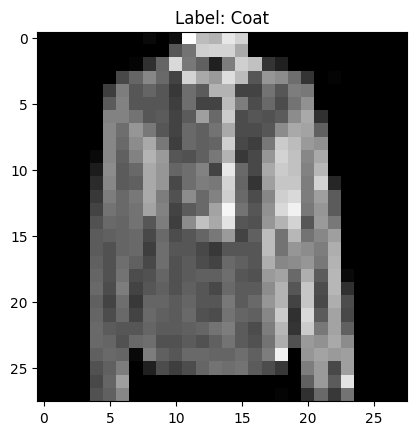

In [90]:

plt.imshow(x_test[random_index, :].reshape(28, 28), cmap='gray')
plt.title(f"Label: {predicted_class_name}")
plt.show()

In [5]:
# MODEL Adam_b32_ep100_drop

from tensorflow import keras

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

# Initial data
num_classes = 10 # total class number
num_features = 784 # input layer vector 28 * 28 = 784

learning_rate = 0.025 # 
training_steps = 100 # number of epoch
batch_size = 32 # пересчитывать веса сети мы будем не на всей выборке, а на ее случайном подможестве из batch_size элементов

n_hidden_1 = 128 # количество нейронов 1-го слоя
n_hidden_2 = 256 # количество нейронов 2-го слоя

# Преобразуем целочисленные пиксели к типа float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Преобразуем матрицы размером 28x28 пикселей в вектор из 784 элементов
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Нормализуем значения пикселей
x_train, x_test = x_train / 255., x_test / 255.

# Convert labels to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Перемешаем тренировочные данные
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(10)


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax'),
])

model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

x_val = x_train[:20000]
partial_x_train = x_train[20000:]

y_val = y_train[:20000]
partial_y_train = y_train[20000:]

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=training_steps,
    batch_size=batch_size,
    validation_data=(x_val, y_val)
)

results = model.evaluate(x_test, y_test)
print(results)



Epoch 1/100
1250/1250 [==============================] - 6s 4ms/step - loss: 0.7674 - accuracy: 0.7211 - val_loss: 0.4752 - val_accuracy: 0.8285
Epoch 2/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.5549 - accuracy: 0.8001 - val_loss: 0.4352 - val_accuracy: 0.8425
Epoch 3/100
1250/1250 [==============================] - 6s 4ms/step - loss: 0.5041 - accuracy: 0.8190 - val_loss: 0.4067 - val_accuracy: 0.8533
Epoch 4/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.4891 - accuracy: 0.8258 - val_loss: 0.3990 - val_accuracy: 0.8530
Epoch 5/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.4700 - accuracy: 0.8316 - val_loss: 0.3923 - val_accuracy: 0.8577
Epoch 6/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.4574 - accuracy: 0.8354 - val_loss: 0.3848 - val_accuracy: 0.8593
Epoch 7/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.4505 - accuracy: 0.8381 - val_loss: 0.3933 - val_ac

1250/1250 [==============================] - 6s 5ms/step - loss: 0.3411 - accuracy: 0.8750 - val_loss: 0.3574 - val_accuracy: 0.8734
Epoch 58/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3360 - accuracy: 0.8777 - val_loss: 0.3630 - val_accuracy: 0.8777
Epoch 59/100
1250/1250 [==============================] - 7s 5ms/step - loss: 0.3368 - accuracy: 0.8764 - val_loss: 0.3543 - val_accuracy: 0.8757
Epoch 60/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3371 - accuracy: 0.8763 - val_loss: 0.3721 - val_accuracy: 0.8732
Epoch 61/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3337 - accuracy: 0.8773 - val_loss: 0.3639 - val_accuracy: 0.8723
Epoch 62/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3329 - accuracy: 0.8783 - val_loss: 0.3459 - val_accuracy: 0.8808
Epoch 63/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3346 - accuracy: 0.8802 - val_loss: 0.3591 - val_accuracy

In [8]:
results = model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 1s 2ms/step - loss: 0.3860 - accuracy: 0.8640
[0.38598495721817017, 0.8640000224113464]


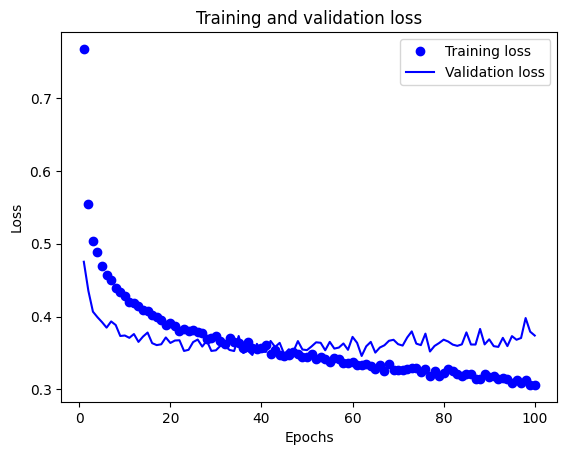

INFO:tensorflow:Assets written to: Adam_b32_ep100_drop\assets


INFO:tensorflow:Assets written to: Adam_b32_ep100_drop\assets


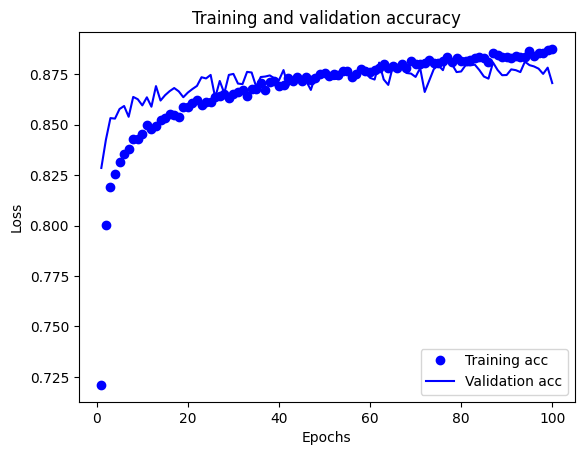

In [6]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

model.save("Adam_b32_ep100_drop")



1/1 [==============================] - 0s 71ms/step
Predicted class: 9


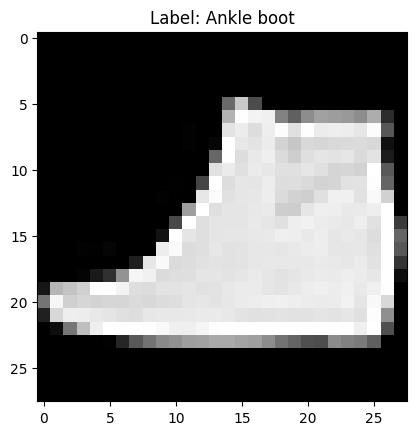

In [7]:
random_index = np.random.randint(0, len(x_test))
result = model.predict(x_test[random_index, :].reshape(1, 784))

predicted_class = np.argmax(result)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

predicted_class_name = class_names[predicted_class]
print(f"Predicted class: {predicted_class}")


plt.imshow(x_test[random_index, :].reshape(28, 28), cmap='gray')
plt.title(f"Label: {predicted_class_name}")
plt.show()

# MODEL Adamax_b128_ep50_drop

In [9]:
from tensorflow import keras

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [11]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [12]:
# Initial data
num_classes = 10 # total class number
num_features = 784 # input layer vector 28 * 28 = 784

learning_rate = 0.025 # 
training_steps = 50 # number of epoch
batch_size = 128 # пересчитывать веса сети мы будем не на всей выборке, а на ее случайном подможестве из batch_size элементов

n_hidden_1 = 128 # количество нейронов 1-го слоя
n_hidden_2 = 256 # количество нейронов 2-го слоя

In [13]:
# Преобразуем целочисленные пиксели к типа float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Преобразуем матрицы размером 28x28 пикселей в вектор из 784 элементов
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Нормализуем значения пикселей
x_train, x_test = x_train / 255., x_test / 255.

# Convert labels to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Перемешаем тренировочные данные
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(10)


In [14]:
from keras.models import Sequential
from keras.layers import Dense

In [15]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax'),
])

In [16]:
model.compile(
    optimizer='Adamax',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
x_val = x_train[:20000]
partial_x_train = x_train[20000:]

y_val = y_train[:20000]
partial_y_train = y_train[20000:]

In [18]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=training_steps,
    batch_size=batch_size,
    validation_data=(x_val, y_val)
)

Epoch 1/50
313/313 [==============================] - 3s 7ms/step - loss: 1.0526 - accuracy: 0.6219 - val_loss: 0.6056 - val_accuracy: 0.7829
Epoch 2/50
313/313 [==============================] - 2s 7ms/step - loss: 0.6731 - accuracy: 0.7591 - val_loss: 0.4985 - val_accuracy: 0.8260
Epoch 3/50
313/313 [==============================] - 2s 7ms/step - loss: 0.5830 - accuracy: 0.7970 - val_loss: 0.4553 - val_accuracy: 0.8364
Epoch 4/50
313/313 [==============================] - 2s 7ms/step - loss: 0.5363 - accuracy: 0.8122 - val_loss: 0.4248 - val_accuracy: 0.8470
Epoch 5/50
313/313 [==============================] - 3s 8ms/step - loss: 0.5012 - accuracy: 0.8237 - val_loss: 0.4100 - val_accuracy: 0.8527
Epoch 6/50
313/313 [==============================] - 3s 8ms/step - loss: 0.4800 - accuracy: 0.8309 - val_loss: 0.3966 - val_accuracy: 0.8562
Epoch 7/50
313/313 [==============================] - 3s 8ms/step - loss: 0.4643 - accuracy: 0.8381 - val_loss: 0.3940 - val_accuracy: 0.8583
Epoch 

In [19]:
results = model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 1s 4ms/step - loss: 0.3449 - accuracy: 0.8784
[0.3448583483695984, 0.8784000277519226]


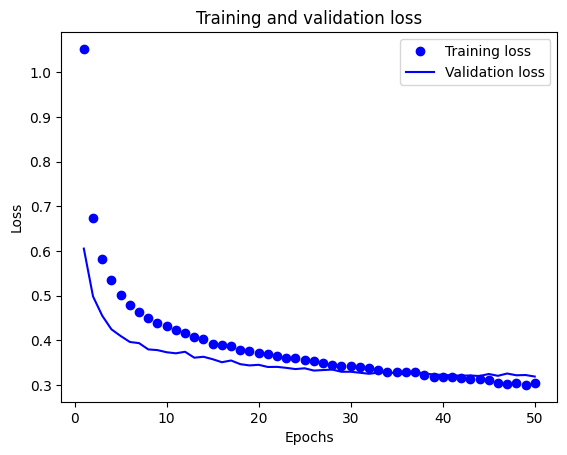

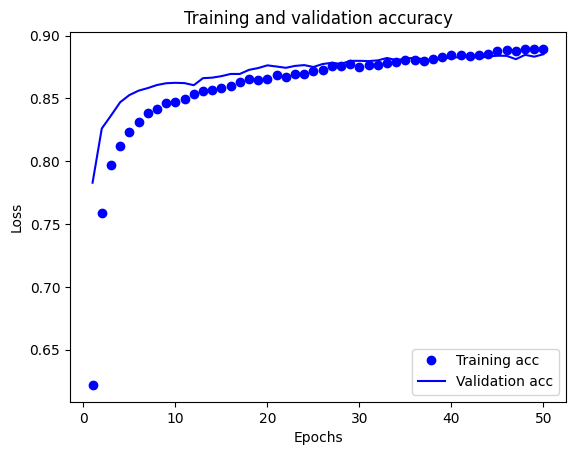

In [20]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [21]:
model.save("Adamax_b128_ep50_drop")

INFO:tensorflow:Assets written to: Adamax_b128_ep50_drop\assets


INFO:tensorflow:Assets written to: Adamax_b128_ep50_drop\assets


In [22]:
random_index = np.random.randint(0, len(x_test))
result = model.predict(x_test[random_index, :].reshape(1, 784))

predicted_class = np.argmax(result)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

predicted_class_name = class_names[predicted_class]
print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 73ms/step
Predicted class: 0


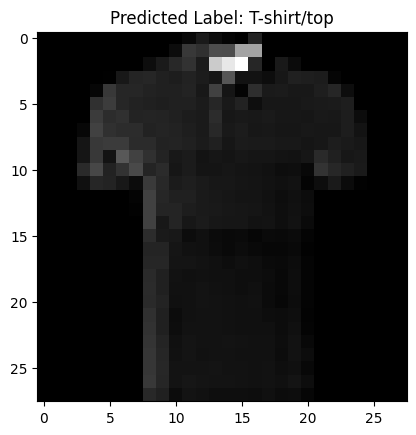

In [23]:

plt.imshow(x_test[random_index, :].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {predicted_class_name}")
plt.show()

# MODEL Adamax_b128_ep50_drop_reg

In [24]:
from tensorflow import keras

In [25]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [26]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [27]:
# Initial data
num_classes = 10 # total class number
num_features = 784 # input layer vector 28 * 28 = 784

learning_rate = 0.025 # 
training_steps = 50 # number of epoch
batch_size = 128 # пересчитывать веса сети мы будем не на всей выборке, а на ее случайном подможестве из batch_size элементов

n_hidden_1 = 128 # количество нейронов 1-го слоя
n_hidden_2 = 256 # количество нейронов 2-го слоя

In [28]:
# Преобразуем целочисленные пиксели к типа float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Преобразуем матрицы размером 28x28 пикселей в вектор из 784 элементов
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Нормализуем значения пикселей
x_train, x_test = x_train / 255., x_test / 255.

# Convert labels to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Перемешаем тренировочные данные
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(10)


In [29]:
from keras.models import Sequential
from keras.layers import Dense

In [30]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,), kernel_regularizer='l2'),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_regularizer='l2'),
    Dropout(0.5),
    Dense(10, activation='softmax'),
])

In [31]:
model.compile(
    optimizer='Adamax',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [32]:
x_val = x_train[:20000]
partial_x_train = x_train[20000:]

y_val = y_train[:20000]
partial_y_train = y_train[20000:]

In [33]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=training_steps,
    batch_size=batch_size,
    validation_data=(x_val, y_val)
)

Epoch 1/50
313/313 [==============================] - 4s 10ms/step - loss: 2.9045 - accuracy: 0.6251 - val_loss: 1.6651 - val_accuracy: 0.7780
Epoch 2/50
313/313 [==============================] - 3s 9ms/step - loss: 1.4476 - accuracy: 0.7568 - val_loss: 1.0701 - val_accuracy: 0.8105
Epoch 3/50
313/313 [==============================] - 3s 8ms/step - loss: 1.0423 - accuracy: 0.7849 - val_loss: 0.8451 - val_accuracy: 0.8186
Epoch 4/50
313/313 [==============================] - 2s 7ms/step - loss: 0.8847 - accuracy: 0.7958 - val_loss: 0.7477 - val_accuracy: 0.8273
Epoch 5/50
313/313 [==============================] - 2s 7ms/step - loss: 0.8077 - accuracy: 0.8013 - val_loss: 0.7048 - val_accuracy: 0.8256
Epoch 6/50
313/313 [==============================] - 3s 8ms/step - loss: 0.7689 - accuracy: 0.8075 - val_loss: 0.6693 - val_accuracy: 0.8329
Epoch 7/50
313/313 [==============================] - 3s 10ms/step - loss: 0.7453 - accuracy: 0.8097 - val_loss: 0.6580 - val_accuracy: 0.8309
Epoc

In [34]:
results = model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 1s 4ms/step - loss: 0.5438 - accuracy: 0.8495
[0.5438122749328613, 0.8495000004768372]


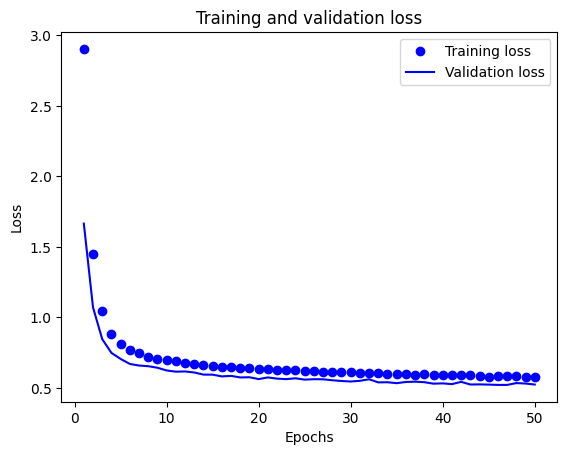

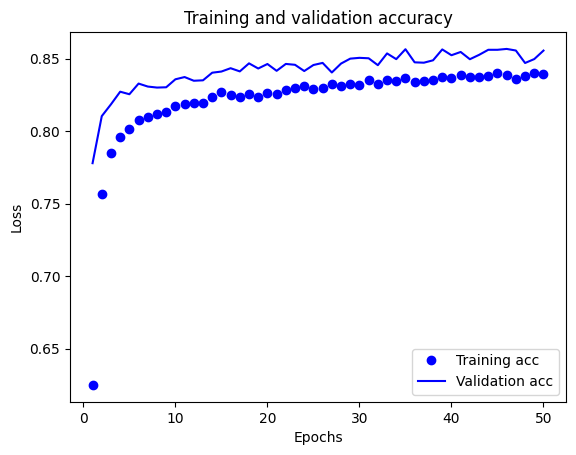

In [35]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [36]:
model.save("Adamax_b128_ep50_drop_reg")

INFO:tensorflow:Assets written to: Adamax_b128_ep50_drop_reg\assets


INFO:tensorflow:Assets written to: Adamax_b128_ep50_drop_reg\assets


In [37]:
random_index = np.random.randint(0, len(x_test))
result = model.predict(x_test[random_index, :].reshape(1, 784))

predicted_class = np.argmax(result)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

predicted_class_name = class_names[predicted_class]
print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 68ms/step
Predicted class: 2


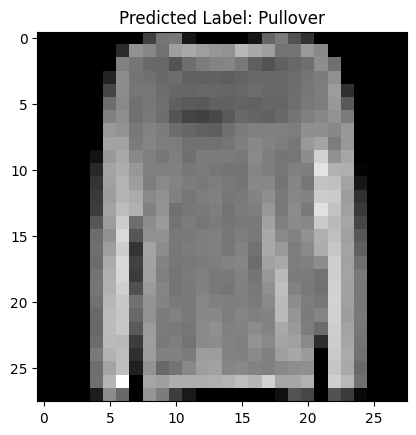

In [38]:

plt.imshow(x_test[random_index, :].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {predicted_class_name}")
plt.show()

# MODEL Adamax_b32_ep50_drop_3layers

In [74]:
from tensorflow import keras

In [75]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [76]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [77]:
# Initial data
num_classes = 10 # total class number
num_features = 784 # input layer vector 28 * 28 = 784

learning_rate = 0.025 # 
training_steps = 50 # number of epoch
batch_size = 32 # пересчитывать веса сети мы будем не на всей выборке, а на ее случайном подможестве из batch_size элементов

n_hidden_1 = 128 # количество нейронов 1-го слоя
n_hidden_2 = 256 # количество нейронов 2-го слоя
n_hidden_3 = 512 # количество нейронов 3-го слоя

In [78]:
# Преобразуем целочисленные пиксели к типа float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Преобразуем матрицы размером 28x28 пикселей в вектор из 784 элементов
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Нормализуем значения пикселей
x_train, x_test = x_train / 255., x_test / 255.

# Convert labels to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Перемешаем тренировочные данные
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(10)


In [79]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [80]:
model = Sequential([
    Dense(n_hidden_1, activation='relu', input_shape=(784,)),
    Dropout(0.3),
    Dense(n_hidden_2, activation='relu'),
    Dropout(0.3),
    Dense(n_hidden_3, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax'),
])

In [81]:
model.compile(
    optimizer='Adamax',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [82]:
x_val = x_train[:30000]
partial_x_train = x_train[30000:]

y_val = y_train[:30000]
partial_y_train = y_train[30000:]

In [ ]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=training_steps,
    batch_size=batch_size,
    validation_data=(x_val, y_val)
)

Epoch 1/50
938/938 [==============================] - 11s 10ms/step - loss: 0.7645 - accuracy: 0.7255 - val_loss: 0.4830 - val_accuracy: 0.8266
Epoch 2/50
938/938 [==============================] - 9s 9ms/step - loss: 0.5172 - accuracy: 0.8152 - val_loss: 0.4426 - val_accuracy: 0.8381
Epoch 3/50
938/938 [==============================] - 9s 9ms/step - loss: 0.4653 - accuracy: 0.8326 - val_loss: 0.4119 - val_accuracy: 0.8498
Epoch 4/50
938/938 [==============================] - 9s 10ms/step - loss: 0.4336 - accuracy: 0.8445 - val_loss: 0.3895 - val_accuracy: 0.8586
Epoch 5/50
938/938 [==============================] - 11s 11ms/step - loss: 0.4157 - accuracy: 0.8490 - val_loss: 0.3788 - val_accuracy: 0.8612
Epoch 6/50
938/938 [==============================] - 11s 12ms/step - loss: 0.3970 - accuracy: 0.8544 - val_loss: 0.3717 - val_accuracy: 0.8668
Epoch 7/50
938/938 [==============================] - 11s 11ms/step - loss: 0.3848 - accuracy: 0.8595 - val_loss: 0.3665 - val_accuracy: 0.86

In [ ]:
results = model.evaluate(x_test, y_test)
print(results)

In [ ]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
model.save("Adamax_b32_ep50_drop_3layers")

In [ ]:
random_index = np.random.randint(0, len(x_test))
result = model.predict(x_test[random_index, :].reshape(1, 784))

predicted_class = np.argmax(result)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

predicted_class_name = class_names[predicted_class]
print(f"Predicted class: {predicted_class}")

In [ ]:

plt.imshow(x_test[random_index, :].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {predicted_class_name}")
plt.show()